In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [ ]:
house_price = sklearn.datasets.load_boston()

In [6]:
house_price_dataframe = pd.DataFrame(house_price.data,columns=house_price.feature_names)
house_price_dataframe['Price'] = house_price.target
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
house_price_dataframe.describe()

In [ ]:
house_price_dataframe.isnull().sum()

In [ ]:
correlation = house_price_dataframe.corr()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square = True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Greens')

In [36]:
X = house_price_dataframe.drop(columns='Price', axis=1)
Y = house_price_dataframe['Price']
x_train,x_test,y_train,y_test = train_test_split(X, Y,test_size=0.2,random_state = 2)

In [ ]:
model = XGBRegressor()
model.fit(x_train,y_train)

In [40]:
ypre = model.predict(x_train)
# R-square error
score_1 = metrics.r2_score(y_train,ypre)
# Mean absolute error
score_2 = metrics.mean_absolute_error(y_train,ypre)

print(score_1, score_2)

0.9733349094832763 1.145314053261634


In [41]:
ypre_test = model.predict(x_test)
# R-square error
score_1t = metrics.r2_score(y_test,ypre_test)
# Mean absolute error
score_2t = metrics.mean_absolute_error(y_test,ypre_test)

print(score_1t, score_2t)

0.9115937697657654 1.9922956859364223


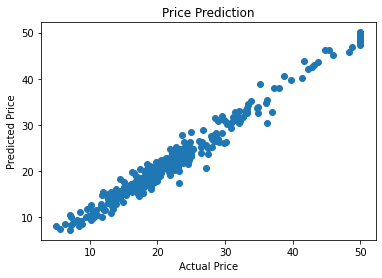

In [43]:
plt.scatter(y_train,ypre)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Price Prediction')
plt.show()

In [46]:
input = (0.02731,	0.0,	7.07,	0.0,	0.469	,6.421	,78.9,	4.9671	,2.0	,242.0,	17.8	,396.90,	9.14)
input_ar = np.array(input)
input_re = input_ar.reshape(1,-1)
data_pr = pd.DataFrame(input_re,columns = house_price.feature_names)
pred_price = model.predict(data_pr)
print(pred_price)

[21.96157]
